# Introdução

O objetivo deste projeto é analisar dados de biodiversidade do Serviço de Parques Nacionais, particularmente em torno de várias espécies observadas em diferentes locais de parques nacionais.

Este projeto irá definir, analisar, preparar, traçar dados e procurar explicar os resultados da análise.

Aqui estão algumas perguntas que este projeto procurou responder:

- Qual é a distribuição do estado de conservação das espécies?
- Certos tipos de espécies são mais prováveis ​​de serem ameaçados?
- As diferenças entre as espécies e o seu estado de conservação são significativas?
- Qual animal é mais prevalente e qual sua distribuição entre os parques?

**Fontes de dados:**

Ambos `Observations.csv` e `Species_info.csv` foram fornecidos por [Codecademy.com](https://www.codecademy.com).

Observação: os dados deste projeto são *inspirados* em dados reais, mas são principalmente fictícios.

## Importar Módulos Python

Importando os módulos primários que serão utilizados neste projeto:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Carregando os Dados

Para analisar o estado de conservação das espécies e suas observações em parques nacionais, carregarei os conjuntos de dados em `DataFrames`. Uma vez carregados como `DataFrames`, os dados podem ser explorados e visualizados com Python.

Nas próximas etapas, `Observations.csv` e `Species_info.csv` são lidos como `DataFrames` chamados `observations` e `species` respectivamente. Os `DataFrames` recém-criados são visualizados com `.head()` para verificar seu conteúdo.

#### Espécies

O `species_info.csv` contém informações sobre as diferentes espécies nos Parques Nacionais. As colunas no conjunto de dados incluem:
- **category** - A categoria de taxonomia para cada espécie
- **scientific_name** - O nome científico de cada espécie
- **common_names** - Os nomes comuns de cada espécie
- **conservation_status** - O estado de conservação da espécie

In [2]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Observações

O `Observations.csv` contém informações de avistamentos registrados de diferentes espécies nos parques nacionais nos últimos 7 dias. As colunas incluídas são:

- **scientific_name** - O nome científico de cada espécie
- **park_name** - O nome do parque nacional
- **observations** - O número de observações nos últimos 7 dias

In [3]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Características dos dados

Em seguida, haverá uma verificação das dimensões dos conjuntos de dados, para `species` existem 5.824 linhas e 4 colunas enquanto `observations` possui 23.296 linhas e 3 colunas.

In [4]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


#### Explorando os Dados
É hora de explorar os dados das 'espécies' um pouco mais a fundo. A primeira coisa é encontrar o número de espécies distintas nos dados.

In [7]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


No próximo passo irei encontrar o numero de categorias representadas nos dados.

In [8]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Aqui está uma chance de detalhar um nível mais profundo e ver a contagem de `category` nos dados.

In [9]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Outra coluna para explorar é `conservation_status`.

In [10]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Em seguida, é feita uma contagem do número de observações na divisão das categorias em `conservation_status`.

In [11]:
print(f"NA values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

NA values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Existem 5.633 valores `nan`, o que significa que são espécies sem preocupações. Por outro lado, existem 161 espécies preocupantes, 16 em perigo, 10 ameaçadas e 4 em recuperação.

Nota: Na maioria dos casos, encontrar valores `nan` deve ser tratado com cuidado, mas a ausência de dados aqui significa que essas espécies não estão sob nenhum status de conservação.

#### Observações
A próxima seção examina os dados de `observations`. A primeira tarefa é verificar o número de parques que estão no conjunto de dados e há apenas 4 parques nacionais.

In [14]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")
print(f"number of observations:{observations.observations.sum()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
number of observations:3314739


#### Análise
Esta seção começará a analisar os dados após a exploração inicial. A primeira tarefa será limpar e explorar a coluna `conservation_status` em `species`.

A coluna `conservation_status` tem vários valores possíveis:
- `Species of Concern`: em declínio ou parecem necessitar de conservação
- `Threatened`: vulnerável a perigo em um futuro próximo
- `Endangered`: seriamente em risco de extinção
- `In Recovery`: anteriormente `Endangered`, mas atualmente não está em perigo de extinção em todo ou em uma parte significativa de seu alcance

Na exploração, muitos valores `nan` foram detectados. Esses valores precisarão ser convertidos para `No Intervention`.

In [15]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Agora, irei verificar as diferentes categorias que estão aninhadas na coluna `conservation_status`, exceto aquelas que não requerem intervenção.

In [16]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


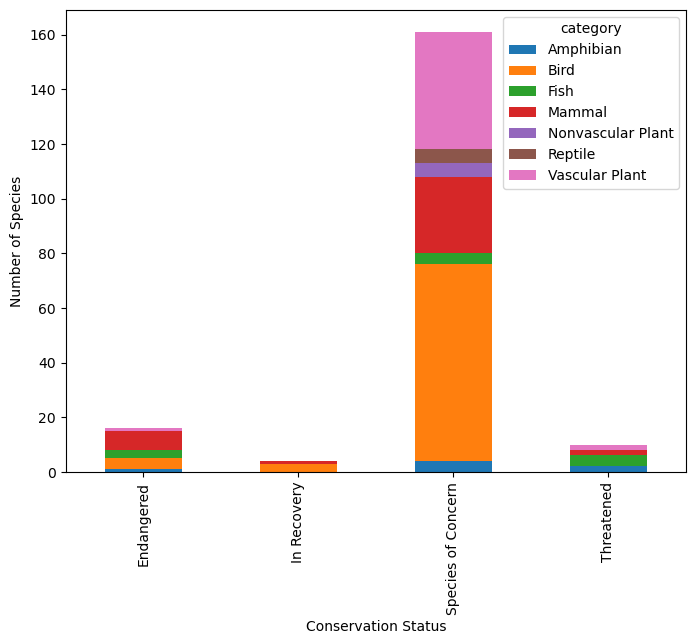

In [17]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

#### Em conservação

A próxima pergunta é se certos tipos de espécies são mais propensos a serem ameaçados? Isso pode ser respondido criando uma nova coluna chamada `is_protected` e incluir qualquer espécie que tenha um valor diferente de `No Intervention`.

In [19]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Agora que a coluna foi criada, irei agrupar por `category` e `is_protected` para mostrar a discriminação de cada tipo de espécie e status de proteção;

In [20]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Números absolutos nem sempre são a estatística mais útil, portanto é importante calcular a taxa de proteção que cada `category` exibe nos dados. A partir dessa análise, irei criar uma coluna com a porcentagem da proteção de cada categoria. 

In [21]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Significado estatístico

Esta seção executará alguns testes qui-quadrado para ver se diferentes espécies têm diferenças estatisticamente significativas nas taxas de status de conservação. Para executar um teste qui-quadrado, uma tabela de contingência precisará ser criada. A tabela de contingência deve ficar assim:

||protegido|não protegido|
|-|-|-|
|Mamífero|?|?|
|Pássaro|?|?|

O primeiro teste será denominado `contingêncy1` e deverá ser preenchido com os números corretos para mamíferos e aves.



In [23]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

O próximo par, vai testar a diferença entre `Reptile` e `Mammal`.

O formato é novamente como abaixo:

||protegido|não protegido|
|-|-|-|
|Mamífero|?|?|
|Réptil|?|?|

Desta vez, o p-value é 0,039, que está abaixo do limite padrão de 0,05, o que pode significar que a diferença entre répteis e mamíferos é estatisticamente significativa. Os mamíferos demonstraram ter uma taxa estatisticamente significativamente maior de proteção necessária em comparação com os répteis.

In [24]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

#### Espécies no Parque
O próximo conjunto de análises virá de dados dos conservacionistas, pois eles registraram avistamentos de diferentes espécies em vários parques nacionais nos últimos 7 dias.

O primeiro passo é olhar para os nomes comuns de `species` para ter uma ideia dos animais mais prevalentes no conjunto de dados. Os dados precisarão ser divididos em nomes individuais.

In [25]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Agora eu irei remover as duplicatas em cada linha, já que elas nao devem ser contadas mais de uma vez por espécie.

In [26]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Agora eu irei juntar as palavras para que fique mais fácil de usar os dados.

In [27]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Agora os dados estão prontos para poder contar o número de ocorrências de cada palavra.

In [28]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
128,Bat,23
71,Shrew,18
19,Myotis,17
169,Mouse,16
34,Chipmunk,13
23,American,12
90,Squirrel,12
122,Eastern,11
155,Vole,11
191,Mountain,10


Nos dados, existem vários nomes científicos diferentes para diferentes tipos de morcegos. A próxima tarefa é descobrir quais linhas de `species` estão se referindo aos morcegos. Uma nova coluna composta por valores booleanos será criada para verificar se `is_bat` é `True`.

In [29]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Aqui está um subconjunto dos dados onde `is_bat` é verdadeiro, retornando para ver as linhas correspondentes.

In [30]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Em seguida, os resultados das espécies de morcegos serão mesclados com `observations` para criar um `DataFrame` com observações de morcegos nos quatro parques nacionais.

In [31]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [32]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Agora vamos ver cada parque dividido por avistamentos de morcegos protegidos versus não protegidos.

In [33]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Abaixo está um gráfico da saída da última manipulação de dados. A partir deste gráfico, pode-se ver que os Parques Nacionais de Yellowstone e Bryce parecem estar fazendo um ótimo trabalho com suas populações de morcegos, pois há mais avistamentos de morcegos protegidos em comparação com espécies não protegidas. O Parque Nacional Great Smoky Mountains pode precisar aumentar seus esforços de conservação, pois eles viram mais espécies não protegidas.

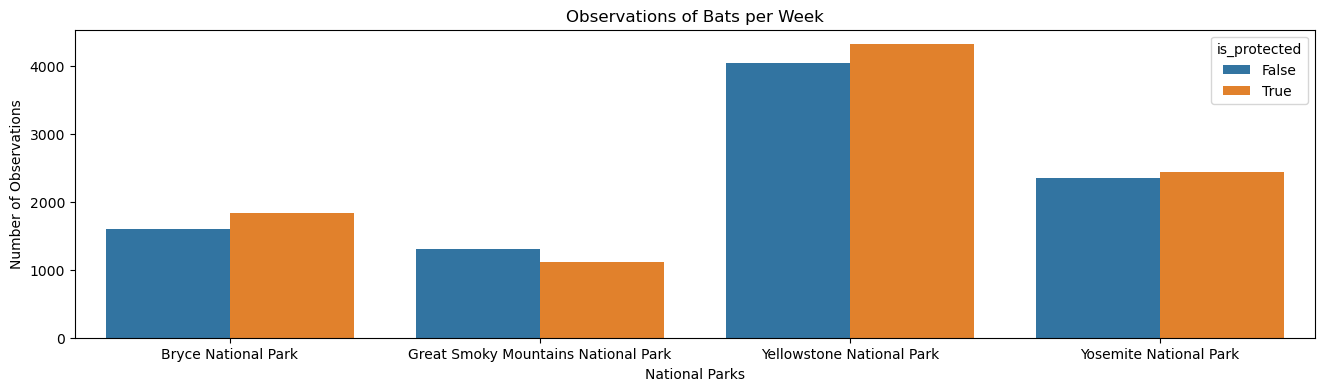

In [34]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusões

O projeto foi capaz de fazer várias visualizações de dados e inferências sobre as várias espécies em quatro dos Parques Nacionais que compunham esse conjunto de dados.

Este projeto também foi capaz de responder a algumas das questões colocadas pela primeira vez no início:

- Qual é a distribuição do estado de conservação das espécies?
    - A grande maioria das espécies não fazia parte da conservação. (5.633 vs 191)
- Certos tipos de espécies são mais prováveis ​​de serem ameaçados?
    - Mamíferos e Aves tiveram a maior porcentagem de proteção.
- As diferenças entre as espécies e o seu estado de conservação são significativas?
    - Enquanto mamíferos e aves não tiveram diferença significativa no percentual de conservação, mamíferos e répteis apresentaram diferença estatisticamente significativa.
- Qual animal é mais prevalente e qual sua distribuição entre os parques?
    - o estudo descobriu que os morcegos ocorreram o maior número de vezes e eram mais prováveis ​​de serem encontrados no Parque Nacional de Yellowstone.